# MonReader Project

## Background:

The goal of this project is to create a model to determine if the page on the picture is being flipped.

## Data Description:

We collected page flipping video from smart phones and labelled them as flipping and not flipping.

We clipped the videos as short videos and labelled them as flipping or not flipping. The extracted frames are then saved to disk in a sequential order with the following naming structure: VideoID_FrameNumber

## Conclusion:

We have a model with f1-score: 0.99 that can predict if in an image shown, there is a flip of a page.
The fastai library was used and Convolutional neural network as our model.

### Import Libraries

In [ ]:
# install fastai
!pip install fastai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import fastai
from fastai.data.all import *
from fastai.vision.all import *

# ingore warnings
import warnings
warnings.filterwarnings('ignore')

# cell output clear tool
from IPython.display import clear_output

# data
import pandas as pd
import numpy as np

# visualisations
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# mount google drive
import os
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Set the path to our data

In [ ]:
# Set path to root directory
path = Path('/content/drive/My Drive/Apziva Projects/L4/Data/images')

# View all files in directory
path.ls()

(#3) [Path('/content/drive/My Drive/Apziva Projects/L4/Data/images/testing'),Path('/content/drive/My Drive/Apziva Projects/L4/Data/images/training'),Path('/content/drive/My Drive/Apziva Projects/L4/Data/images/models')]

### Create ImageDataLoaders Object

This object pulls together all our train data, test data, and validation data and performs the necessary transformations to the images

In [ ]:
# We are creating a fastai DataLoaders from our dataset
# Preprocessing takes place when creating the dataloaders
# May need to decrease batch size and num_workers depending on GPU
data = ImageDataLoaders.from_folder(path, 
                                    train='training', 
                                    valid='testing', 
                                    #size=50, 
                                    bs=8, # number of samples we want to pass into the training loop at each iteration
                                    pin_memory = True, # if you are using a CUDA device or GPU, this should speed up loading by removing a copy during the loading operation
                                    drop_last = True,
                                    num_workers=0) 

['flip', 'notflip'] 2
2392 597


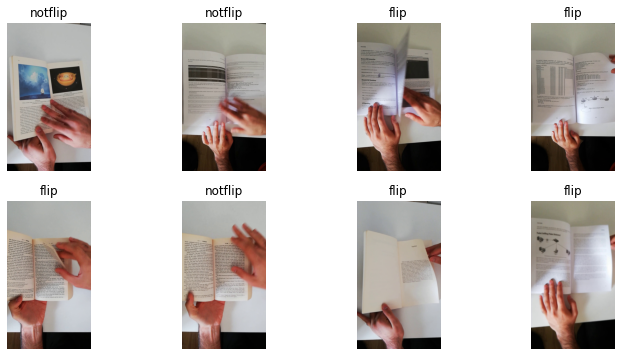

In [ ]:
# Show what the data looks like after being transformed
data.show_batch()

# See the classes and count of classes in your dataset
print(data.vocab,data.c)

# See the number of images in each data set
print(len(data.train_ds), len(data.valid_ds))

### Build our CNN model

In [ ]:
# Build the CNN model with the pretrained resnet34
learn = cnn_learner(data, models.resnet18, metrics = [accuracy, FBeta(beta=1)]) # beta=1 in fbeta is the same as f1-score

# Train the model on 4 epochs of data at the default learning rate
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,0.340745,0.104223,0.954774,0.955519,07:14
1,0.170917,0.076479,0.973199,0.974522,07:03
2,0.127168,0.045949,0.976549,0.977636,06:59
3,0.130805,0.025711,0.991625,0.991790,06:59


### Save the Model

In [ ]:
# Save the model
learn.save('stage-1')

# Load the Model
#learn.load('stage-1')

Path('/content/drive/My Drive/Apziva Projects/L4/Data/images/models/stage-1.pth')

### Improve our model by finding the best learning rate

SuggestedLRs(valley=2.2908675418875646e-06)

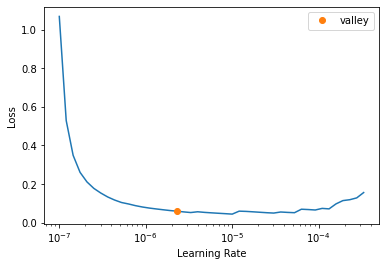

In [ ]:
# Unfreeze all layers of the CNN
learn.unfreeze()

# Find the optimal learning rate and plot a visual
learn.lr_find()

In [ ]:
# Fit the model over 2 epochs
learn.fit_one_cycle(2, lr_max=slice(2.2908675418875646e-07, 2.2908675418875646e-06))

epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,0.072091,0.016947,0.996650,0.996743,08:25
1,0.101757,0.019435,0.991625,0.991896,08:18


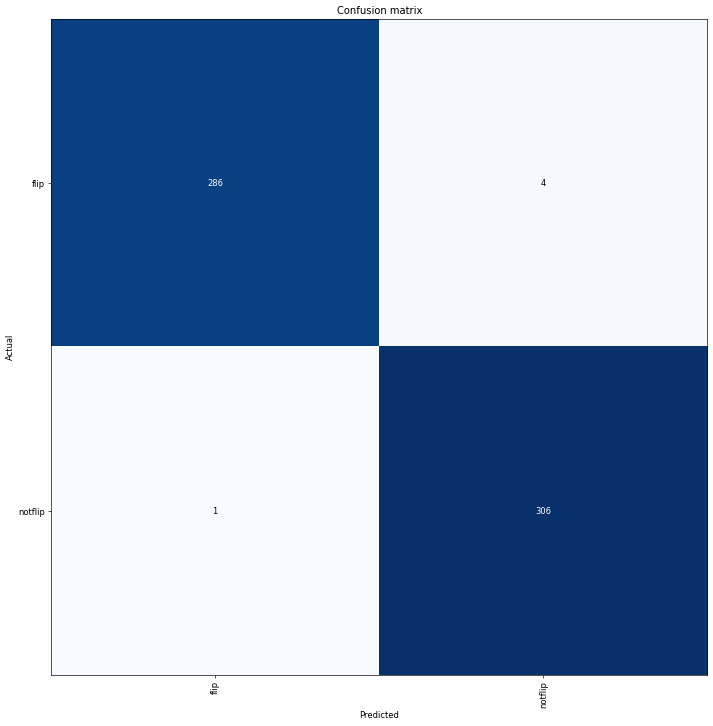

In [ ]:
# Rebuild interpreter and replot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

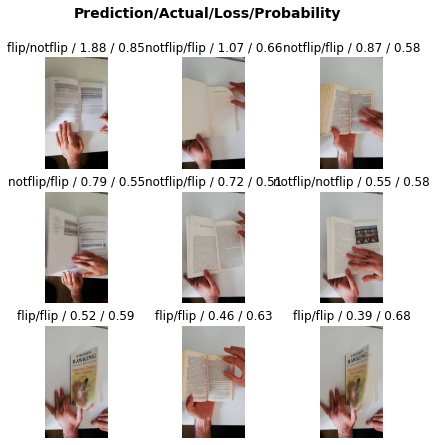

In [ ]:
# plot_top_losses
interp.plot_top_losses(9, figsize=(7,7))

**Conclusion:**

We have a model with f1-score: 0.99 that can predict if in an image shown, there is a flip of a page.
The fastai library was used and Convolutional neural network as our model.